In [183]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
#import matplotlib.pyplot as plt
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

Step 1: Import data from exported raw survey data

In [184]:
df = pd.read_csv("C:/Users/Owner/Desktop/AlaskaProject/seatsurveymodel.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,7,8,25,26,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240,252,264,276,283,288,289,290) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Step 2: Observe and summarize data

In [185]:
# Column names overview
df.columns

Index(['participant.id_in_session', 'participant.code', 'participant.label',
       'participant._is_bot', 'participant._index_in_pages',
       'participant._max_page_index', 'participant._current_app_name',
       'participant._current_page_name', 'participant.time_started',
       'participant.visited',
       ...
       'survey.1.player.gender', 'survey.1.player.feet',
       'survey.1.player.inches', 'survey.1.player.rt',
       'survey.1.player.bizlei', 'survey.1.player.seattype',
       'survey.1.player.section', 'survey.1.player.comment',
       'survey.1.group.id_in_subsession', 'survey.1.subsession.round_number'],
      dtype='object', length=293)

Step 3: Trim width of dataframe

In [186]:
# Drop irrelevant columns
df.drop(['participant.label','participant._is_bot','participant._max_page_index',
        'participant._current_page_name','participant.visited',
        'participant.mturk_worker_id','participant.mturk_assignment_id','participant.payoff',
        'session.label','session.mturk_HITId','session.mturk_HITGroupId','session.comment', 'session.is_demo',  'session.config.real_world_currency_per_point', 'session.config.participation_fee', 'randseq.1.player.role', 'randseq.1.player.payoff', 'randseq.1.group.id_in_subsession', 'randseq.1.subsession.round_number', 'survey.1.player.id_in_group', 'survey.1.player.role', 'survey.1.player.payoff'], inplace = True, axis = 1
       )

In [187]:
# Verify removal of specified columns
df.columns

Index(['participant.id_in_session', 'participant.code',
       'participant._index_in_pages', 'participant._current_app_name',
       'participant.time_started', 'session.code',
       'randseq.1.player.id_in_group', 'randseq.1.player.page_sequence',
       'randseq.1.player.choice1', 'randseq.1.player.choice2',
       ...
       'survey.1.player.gender', 'survey.1.player.feet',
       'survey.1.player.inches', 'survey.1.player.rt',
       'survey.1.player.bizlei', 'survey.1.player.seattype',
       'survey.1.player.section', 'survey.1.player.comment',
       'survey.1.group.id_in_subsession', 'survey.1.subsession.round_number'],
      dtype='object', length=271)

Step 4: Re-label fields

In [188]:
# Rename/shorten column names
df.rename(columns=
{
"session.code": "session_code",    
"participant.id_in_session": "id_in_session",
"participant._index_in_pages": "index_in_pages",
"participant._current_app_name": "current_app_name",
"participant.time_started": "time_started",
"randseq.1.player.id_in_group": "id_in_group",
"randseq.1.player.page_sequence": "page_sequence",

"randseq.1.player.choice1": "choice1",
"randseq.1.player.distance_1": "distance_1",
"randseq.1.player.time_1": "time_1",
"randseq.1.player.price_1": "price_1",
"randseq.1.player.row_1a": "rowA_1",
"randseq.1.player.row_1b": "rowB_1",
"randseq.1.player.col_1a": "colA_1",
"randseq.1.player.col_1b": "colB_1",
"randseq.1.player.price_1a": "priceA_1",
"randseq.1.player.price_1b": "priceB_1",
"randseq.1.player.legroom_1a": "legroomA_1",
"randseq.1.player.legroom_1b": "legroomB_1",

"randseq.1.player.choice2": "choice2",
"randseq.1.player.distance_2": "distance_2",
"randseq.1.player.time_2": "time_2",
"randseq.1.player.price_2": "price_2",
"randseq.1.player.row_2a": "rowA_2",
"randseq.1.player.row_2b": "rowB_2",
"randseq.1.player.col_2a": "colA_2",
"randseq.1.player.col_2b": "colB_2",
"randseq.1.player.price_2a": "priceA_2",
"randseq.1.player.price_2b": "priceB_2",
"randseq.1.player.legroom_2a": "legroomA_2",
"randseq.1.player.legroom_2b": "legroomB_2",

"randseq.1.player.choice3": "choice3",
"randseq.1.player.distance_3": "distance_3",
"randseq.1.player.time_3": "time_3",
"randseq.1.player.price_3": "price_3",
"randseq.1.player.row_3a": "rowA_3",
"randseq.1.player.row_3b": "rowB_3",
"randseq.1.player.col_3a": "colA_3",
"randseq.1.player.col_3b": "colB_3",
"randseq.1.player.price_3a": "priceA_3",
"randseq.1.player.price_3b": "priceB_3",
"randseq.1.player.legroom_3a": "legroomA_3",
"randseq.1.player.legroom_3b": "legroomB_3",

"randseq.1.player.choice4": "choice4",
"randseq.1.player.distance_4": "distance_4",
"randseq.1.player.time_4": "time_4",
"randseq.1.player.price_4": "price_4",
"randseq.1.player.row_4a": "rowA_4",
"randseq.1.player.row_4b": "rowB_4",
"randseq.1.player.col_4a": "colA_4",
"randseq.1.player.col_4b": "colB_4",
"randseq.1.player.price_4a": "priceA_4",
"randseq.1.player.price_4b": "priceB_4",
"randseq.1.player.legroom_4a": "legroomA_4",
"randseq.1.player.legroom_4b": "legroomB_4",

"randseq.1.player.choice_5": "choice5",
"randseq.1.player.distance_5": "distance_5",
"randseq.1.player.time_5": "time_5",
"randseq.1.player.price_5": "price_5",
"randseq.1.player.row_5a": "rowA_5",
"randseq.1.player.row_5b": "rowB_5",
"randseq.1.player.col_5a": "colA_5",
"randseq.1.player.col_5b": "colB_5",
"randseq.1.player.price_5a": "priceA_5",
"randseq.1.player.price_5b": "priceB_5",
"randseq.1.player.legroom_5a": "legroomA_5",
"randseq.1.player.legroom_5b": "legroomB_5",

"randseq.1.player.choice_6": "choice6",
"randseq.1.player.distance_6": "distance_6",
"randseq.1.player.time_6": "time_6",
"randseq.1.player.price_6": "price_6",
"randseq.1.player.row_6a": "rowA_6",
"randseq.1.player.row_6b": "rowB_6",
"randseq.1.player.col_6a": "colA_6",
"randseq.1.player.col_6b": "colB_6",
"randseq.1.player.price_6a": "priceA_6",
"randseq.1.player.price_6b": "priceB_6",
"randseq.1.player.legroom_6a": "legroomA_6",
"randseq.1.player.legroom_6b": "legroomB_6",

"randseq.1.player.choice_7": "choice7",
"randseq.1.player.distance_7": "distance_7",
"randseq.1.player.time_7": "time_7",
"randseq.1.player.price_7": "price_7",
"randseq.1.player.row_7a": "rowA_7",
"randseq.1.player.row_7b": "rowB_7",
"randseq.1.player.col_7a": "colA_7",
"randseq.1.player.col_7b": "colB_7",
"randseq.1.player.price_7a": "priceA_7",
"randseq.1.player.price_7b": "priceB_7",
"randseq.1.player.legroom_7a": "legroomA_7",
"randseq.1.player.legroom_7b": "legroomB_7",

"randseq.1.player.choice_8": "choice8",
"randseq.1.player.distance_8": "distance_8",
"randseq.1.player.time_8": "time_8",
"randseq.1.player.price_8": "price_8",
"randseq.1.player.row_8a": "rowA_8",
"randseq.1.player.row_8b": "rowB_8",
"randseq.1.player.col_8a": "colA_8",
"randseq.1.player.col_8b": "colB_8",
"randseq.1.player.price_8a": "priceA_8",
"randseq.1.player.price_8b": "priceB_8",
"randseq.1.player.legroom_8a": "legroomA_8",
"randseq.1.player.legroom_8b": "legroomB_8",

"randseq.1.player.choice_9": "choice9",
"randseq.1.player.distance_9": "distance_9",
"randseq.1.player.time_9": "time_9",
"randseq.1.player.price_9": "price_9",
"randseq.1.player.row_9a": "rowA_9",
"randseq.1.player.row_9b": "rowB_9",
"randseq.1.player.col_9a": "colA_9",
"randseq.1.player.col_9b": "colB_9",
"randseq.1.player.price_9a": "priceA_9",
"randseq.1.player.price_9b": "priceB_9",
"randseq.1.player.legroom_9a": "legroomA_9",
"randseq.1.player.legroom_9b": "legroomB_9",

"randseq.1.player.choice_10": "choice10",
"randseq.1.player.distance_10": "distance_10",
"randseq.1.player.time_10": "time_10",
"randseq.1.player.price_10": "price_10",
"randseq.1.player.row_10a": "rowA_10",
"randseq.1.player.row_10b": "rowB_10",
"randseq.1.player.col_10a": "colA_10",
"randseq.1.player.col_10b": "colB_10",
"randseq.1.player.price_10a": "priceA_10",
"randseq.1.player.price_10b": "priceB_10",
"randseq.1.player.legroom_10a": "legroomA_10",
"randseq.1.player.legroom_10b": "legroomB_10",

"randseq.1.player.choice_11": "choice11",
"randseq.1.player.distance_11": "distance_11",
"randseq.1.player.time_11": "time_11",
"randseq.1.player.price_11": "price_11",
"randseq.1.player.row_11a": "rowA_11",
"randseq.1.player.row_11b": "rowB_11",
"randseq.1.player.col_11a": "colA_11",
"randseq.1.player.col_11b": "colB_11",
"randseq.1.player.price_11a": "priceA_11",
"randseq.1.player.price_11b": "priceB_11",
"randseq.1.player.legroom_11a": "legroomA_11",
"randseq.1.player.legroom_11b": "legroomB_11",

"randseq.1.player.choice_12": "choice12",
"randseq.1.player.distance_12": "distance_12",
"randseq.1.player.time_12": "time_12",
"randseq.1.player.price_12": "price_12",
"randseq.1.player.row_12a": "rowA_12",
"randseq.1.player.row_12b": "rowB_12",
"randseq.1.player.col_12a": "colA_12",
"randseq.1.player.col_12b": "colB_12",
"randseq.1.player.price_12a": "priceA_12",
"randseq.1.player.price_12b": "priceB_12",
"randseq.1.player.legroom_12a": "legroomA_12",
"randseq.1.player.legroom_12b": "legroomB_12",

"randseq.1.player.choice_13": "choice13",
"randseq.1.player.distance_13": "distance_13",
"randseq.1.player.time_13": "time_13",
"randseq.1.player.price_13": "price_13",
"randseq.1.player.row_13a": "rowA_13",
"randseq.1.player.row_13b": "rowB_13",
"randseq.1.player.col_13a": "colA_13",
"randseq.1.player.col_13b": "colB_13",
"randseq.1.player.price_13a": "priceA_13",
"randseq.1.player.price_13b": "priceB_13",
"randseq.1.player.legroom_13a": "legroomA_13",
"randseq.1.player.legroom_13b": "legroomB_13",

"randseq.1.player.choice_14": "choice14",
"randseq.1.player.distance_14": "distance_14",
"randseq.1.player.time_14": "time_14",
"randseq.1.player.price_14": "price_14",
"randseq.1.player.row_14a": "rowA_14",
"randseq.1.player.row_14b": "rowB_14",
"randseq.1.player.col_14a": "colA_14",
"randseq.1.player.col_14b": "colB_14",
"randseq.1.player.price_14a": "priceA_14",
"randseq.1.player.price_14b": "priceB_14",
"randseq.1.player.legroom_14a": "legroomA_14",
"randseq.1.player.legroom_14b": "legroomB_14",

"randseq.1.player.choice_15": "choice15",
"randseq.1.player.distance_15": "distance_15",
"randseq.1.player.time_15": "time_15",
"randseq.1.player.price_15": "price_15",
"randseq.1.player.row_15a": "rowA_15",
"randseq.1.player.row_15b": "rowB_15",
"randseq.1.player.col_15a": "colA_15",
"randseq.1.player.col_15b": "colB_15",
"randseq.1.player.price_15a": "priceA_15",
"randseq.1.player.price_15b": "priceB_15",
"randseq.1.player.legroom_15a": "legroomA_15",
"randseq.1.player.legroom_15b": "legroomB_15",

"randseq.1.player.choice_16": "choice16",
"randseq.1.player.distance_16": "distance_16",
"randseq.1.player.time_16": "time_16",
"randseq.1.player.price_16": "price_16",
"randseq.1.player.row_16a": "rowA_16",
"randseq.1.player.row_16b": "rowB_16",
"randseq.1.player.col_16a": "colA_16",
"randseq.1.player.col_16b": "colB_16",
"randseq.1.player.price_16a": "priceA_16",
"randseq.1.player.price_16b": "priceB_16",
"randseq.1.player.legroom_16a": "legroomA_16",
"randseq.1.player.legroom_16b": "legroomB_16",

"randseq.1.player.choice_17": "choice17",
"randseq.1.player.distance_17": "distance_17",
"randseq.1.player.time_17": "time_17",
"randseq.1.player.price_17": "price_17",
"randseq.1.player.row_17a": "rowA_17",
"randseq.1.player.row_17b": "rowB_17",
"randseq.1.player.col_17a": "colA_17",
"randseq.1.player.col_17b": "colB_17",
"randseq.1.player.price_17a": "priceA_17",
"randseq.1.player.price_17b": "priceB_17",
"randseq.1.player.legroom_17a": "legroomA_17",
"randseq.1.player.legroom_17b": "legroomB_17",

"randseq.1.player.choice_18": "choice18",
"randseq.1.player.distance_18": "distance_18",
"randseq.1.player.time_18": "time_18",
"randseq.1.player.price_18": "price_18",
"randseq.1.player.row_18a": "rowA_18",
"randseq.1.player.row_18b": "rowB_18",
"randseq.1.player.col_18a": "colA_18",
"randseq.1.player.col_18b": "colB_18",
"randseq.1.player.price_18a": "priceA_18",
"randseq.1.player.price_18b": "priceB_18",
"randseq.1.player.legroom_18a": "legroomA_18",
"randseq.1.player.legroom_18b": "legroomB_18",

"randseq.1.player.choice_19": "choice19",
"randseq.1.player.distance_19": "distance_19",
"randseq.1.player.time_19": "time_19",
"randseq.1.player.price_19": "price_19",
"randseq.1.player.row_19a": "rowA_19",
"randseq.1.player.row_19b": "rowB_19",
"randseq.1.player.col_19a": "colA_19",
"randseq.1.player.col_19b": "colB_19",
"randseq.1.player.price_19a": "priceA_19",
"randseq.1.player.price_19b": "priceB_19",
"randseq.1.player.legroom_19a": "legroomA_19",
"randseq.1.player.legroom_19b": "legroomB_19",

"randseq.1.player.choice_20": "choice20",
"randseq.1.player.distance_20": "distance_20",
"randseq.1.player.time_20": "time_20",
"randseq.1.player.price_20": "price_20",
"randseq.1.player.row_20a": "rowA_20",
"randseq.1.player.row_20b": "rowB_20",
"randseq.1.player.col_20a": "colA_20",
"randseq.1.player.col_20b": "colB_20",
"randseq.1.player.price_20a": "priceA_20",
"randseq.1.player.price_20b": "priceB_20",
"randseq.1.player.legroom_20a": "legroomA_20",
"randseq.1.player.legroom_20b": "legroomB_20",

"randseq.1.player.choice_21": "choice21",
"randseq.1.player.distance_21": "distance_21",
"randseq.1.player.time_21": "time_21",
"randseq.1.player.price_21": "price_21",
"randseq.1.player.row_21a": "rowA_21",
"randseq.1.player.row_21b": "rowB_21",
"randseq.1.player.col_21a": "colA_21",
"randseq.1.player.col_21b": "colB_21",
"randseq.1.player.price_21a": "priceA_21",
"randseq.1.player.price_21b": "priceB_21",
"randseq.1.player.legroom_21a": "legroomA_21",
"randseq.1.player.legroom_21b": "legroomB_21",

"survey.1.player.age": "age",
"survey.1.player.gender": "gender",
"survey.1.player.feet": "height_feet",
"survey.1.player.inches": "height_inches",
"survey.1.player.rt": "annual_trip_freq",
"survey.1.player.bizlei": "percentage_biz",
"survey.1.player.seattype": "seat_type_preference",
"survey.1.player.section": "section_preference",
"survey.1.player.comment": "comment"

}, inplace=True)

Step 5: Remove incomplete survey responses

In [189]:
# Filter to keep only completed survey rows
filtered_df = df.query('current_app_name == "survey" and session_code == "s6qkz77s" or session_code =="ei2phjog"')
filtered_df.info()
filtered_df.describe()
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 24 to 328
Columns: 271 entries, id_in_session to survey.1.subsession.round_number
dtypes: float64(26), int64(152), object(93)
memory usage: 291.1+ KB


,id_in_session,participant.code,index_in_pages,current_app_name,time_started,session_code,id_in_group,page_sequence,choice1,choice2,...,gender,height_feet,height_inches,annual_trip_freq,percentage_biz,seat_type_preference,section_preference,comment,survey.1.group.id_in_subsession,survey.1.subsession.round_number
24,1,ixi1jkao,23,survey,2021-04-15 23:36:35.096369+00:00,s6qkz77s,1,"[""Q21"", ""Q15"", ""Q4"", ""Q2"", ""Q19"", ""Q12"", ""Q10""...",Seat A,Seat B,...,Male,5.0,10.0,6.0,25.0,Window,Economy,NaN,1,1
28,5,p1n8e9va,23,survey,2021-04-16 01:35:43.132533+00:00,s6qkz77s,5,"[""Q7"", ""Q14"", ""Q9"", ""Q3"", ""Q18"", ""Q15"", ""Q21"",...",Seat A,Seat B,...,Male,5.0,8.0,5.0,40.0,Aisle,First,NaN,1,1
29,6,8j3yb395,23,survey,2021-04-16 01:36:06.063812+00:00,s6qkz77s,6,"[""Q3"", ""Q12"", ""Q1"", ""Q21"", ""Q17"", ""Q18"", ""Q11""...",Seat A,Seat B,...,Female,5.0,8.0,6.0,50.0,Window,Economy,NaN,1,1
38,15,pr29qnzv,23,survey,2021-04-16 02:40:31.624725+00:00,s6qkz77s,15,"[""Q14"", ""Q17"", ""Q3"", ""Q4"", ""Q9"", ""Q16"", ""Q8"", ...",Seat B,Seat B,...,Male,5.0,9.0,1.0,0.0,Window,Economy,How do you handle bias from people who have ne...,1,1
39,16,l0hz8k3t,23,survey,2021-04-16 02:55:05.067225+00:00,s6qkz77s,16,"[""Q15"", ""Q3"", ""Q14"", ""Q1"", ""Q20"", ""Q5"", ""Q9"", ...",Seat A,Seat B,...,Female,5.0,11.0,12.0,9.0,Middle,Premier,NaN,1,1


Now that the data is trimmed into a manageable size, we will transform/clean it to be used for modeling.
Each row in our current dataframe corresponds to a participant with over 100 columns of fields that span 21 questions. With the intent of using Logit Regression analysis for modeling the binary probability of choosing seat A or seat B (21 pairs), we decided to break each participant row into 21 rows with each row corresponding to a unique participant-question combination.
To do this, we utilized the Pandas wide_to_long function to transform the dataframe (see code below):

In [190]:
#Create 21 rows for each person
df_clean = pd.wide_to_long(filtered_df, ['choice','price_','distance_','time_','legroomA_','legroomB_','priceA_','priceB_',
                                         'colA_','colB_','rowA_','rowB_'], i = 'participant.code', 
                                           j = 'question').sort_values(['participant.code','question'])

In [191]:
#Create data frame
df_clean = df_clean.reset_index()
df_clean

,participant.code,question,seat_type_preference,current_app_name,gender,height_feet,index_in_pages,annual_trip_freq,section_preference,height_inches,...,distance_,time_,legroomA_,legroomB_,priceA_,priceB_,colA_,colB_,rowA_,rowB_
0,0ae9sh8m,1,Window,survey,Female,5.0,23,5.0,Economy,7.0,...,1.7,Red-eye,0,1,10,0,E,E,13,27
1,0ae9sh8m,2,Window,survey,Female,5.0,23,5.0,Economy,7.0,...,5.5,Red-eye,1,1,2,5,E,F,10,10
2,0ae9sh8m,3,Window,survey,Female,5.0,23,5.0,Economy,7.0,...,5.1,Red-eye,0,0,1,10,A,C,13,13
3,0ae9sh8m,4,Window,survey,Female,5.0,23,5.0,Economy,7.0,...,2.5,Daytime,3,3,11,60,F,E,14,8
4,0ae9sh8m,5,Window,survey,Female,5.0,23,5.0,Economy,7.0,...,4.7,Red-eye,4,1,52,8,F,C,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,yp2s1c53,17,Window,survey,Male,6.0,23,2.0,Economy,1.0,...,3.1,Red-eye,1,0,16,0,F,A,26,9
2873,yp2s1c53,18,Window,survey,Male,6.0,23,2.0,Economy,1.0,...,4.8,Daytime,1,1,4,3,D,C,13,17
2874,yp2s1c53,19,Window,survey,Male,6.0,23,2.0,Economy,1.0,...,0.9,Red-eye,2,3,37,38,A,E,8,6
2875,yp2s1c53,20,Window,survey,Male,6.0,23,2.0,Economy,1.0,...,3.2,Red-eye,1,0,3,2,A,F,11,16


Furthermore, to eliminate skewness/bias in our analysis, we decided to scale the continuous variables (i.e. legroom, price, height, age, distance).

[To confirm with Alaska]
There is uncertainty regarding whether to scale the incremental price versus scale the total price as it is a possibility that the survey respondent did not factor the base price into their decision-making. Another consideration is to classify age as a categorical variable instead of a continuous variable pending the age distribution of the survey respondents.

In [192]:
#Binary Variable on whether they chose Seat A
df_clean["choice_binary"] = np.where(df_clean["choice"] == 'Seat A', 1, 0)

In [193]:
#Adding Seat Class
df_clean["seatA_class"] = np.where(df_clean["rowA_"].between(1,4), "First", 
                            np.where(df_clean["rowA_"].between(5,8), "Premium", "Economy"))
df_clean["seatB_class"] = np.where(df_clean["rowB_"].between(1,4), "First", 
                            np.where(df_clean["rowB_"].between(5,8), "Premium", "Economy"))

In [194]:
#Turn Columns into Window/Middle/Aisle
df_clean["colA_categorical"] = np.where((df_clean["colA_"] == 'A') | (df_clean["colA_"] == 'F'), "Window",
                                np.where((df_clean["colA_"] == 'B') | (df_clean["colA_"] == 'E'), "Middle", "Aisle"))

df_clean["colB_categorical"] = np.where((df_clean["colB_"] == 'A') | (df_clean["colB_"] == 'F'), "Window",
                                np.where((df_clean["colB_"] == 'B') | (df_clean["colB_"] == 'E'), "Middle", "Aisle"))

In [195]:
#Adding Left/Right in Plane
df_clean["plane_side"] = np.where((df_clean["colA_"] == 'A') | (df_clean["colA_"] == 'B') | (df_clean["colA_"] == 'C'), 
                                  "Left", "Right")

In [196]:
#Adding Distance to Bathroom Variable
df_clean["bathroom_distA"] = np.where(df_clean["rowA_"] == 27, 0, (26 - df_clean["rowA_"]))
df_clean["bathroom_distB"] = np.where(df_clean["rowB_"] == 27, 0, (26 - df_clean["rowB_"]))

In [197]:
df_clean.drop(["index_in_pages", "survey.1.group.id_in_subsession", "time_started", "current_app_name", "id_in_group",
                  "id_in_session", "page_sequence", "survey.1.subsession.round_number", "session_code"],
                      inplace = True, axis = 1)

In [198]:
df_clean.to_csv('seatsurvey_clean3.csv', header=True)

In [199]:
#Order Columns
df_clean = df_clean[['choice_binary','rowA_','rowB_','colA_','colB_','colA_categorical','colB_categorical',
                     'seatA_class','seatB_class','plane_side','priceA_','priceB_','legroomA_','legroomB_',
                     'bathroom_distA','bathroom_distB','time_','distance_','price_','choice',
                     'seat_type_preference', 'gender', 'height_feet','annual_trip_freq', 
                     'section_preference', 'height_inches', 'comment', 'age', 'percentage_biz']]


In [200]:
df_clean.head()

,choice_binary,rowA_,rowB_,colA_,colB_,colA_categorical,colB_categorical,seatA_class,seatB_class,plane_side,...,choice,seat_type_preference,gender,height_feet,annual_trip_freq,section_preference,height_inches,comment,age,percentage_biz
0,1,13,27,E,E,Middle,Middle,Economy,Economy,Right,...,Seat A,Window,Female,5.0,5.0,Economy,7.0,NaN,65.0,0.0
1,0,10,10,E,F,Middle,Window,Economy,Economy,Right,...,Seat B,Window,Female,5.0,5.0,Economy,7.0,NaN,65.0,0.0
2,1,13,13,A,C,Window,Aisle,Economy,Economy,Left,...,Seat A,Window,Female,5.0,5.0,Economy,7.0,NaN,65.0,0.0
3,1,14,8,F,E,Window,Middle,Economy,Premium,Right,...,Seat A,Window,Female,5.0,5.0,Economy,7.0,NaN,65.0,0.0
4,1,5,21,F,C,Window,Aisle,Premium,Economy,Right,...,Seat A,Window,Female,5.0,5.0,Economy,7.0,NaN,65.0,0.0


Create dummy variables for logistic regressions. 

In [201]:
df_clean_dummies = pd.get_dummies(df_clean, columns = ['colA_categorical','colB_categorical','seatA_class','seatB_class',
                                                      'plane_side','time_'] )
df_clean_dummies

,choice_binary,rowA_,rowB_,colA_,colB_,priceA_,priceB_,legroomA_,legroomB_,bathroom_distA,...,seatA_class_Economy,seatA_class_First,seatA_class_Premium,seatB_class_Economy,seatB_class_First,seatB_class_Premium,plane_side_Left,plane_side_Right,time__Daytime,time__Red-eye
0,1,13,27,E,E,10,0,0,1,13,...,1,0,0,1,0,0,0,1,0,1
1,0,10,10,E,F,2,5,1,1,16,...,1,0,0,1,0,0,0,1,0,1
2,1,13,13,A,C,1,10,0,0,13,...,1,0,0,1,0,0,1,0,0,1
3,1,14,8,F,E,11,60,3,3,12,...,1,0,0,0,0,1,0,1,1,0
4,1,5,21,F,C,52,8,4,1,21,...,0,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,0,26,9,F,A,16,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
2873,0,13,17,D,C,4,3,1,1,13,...,1,0,0,1,0,0,0,1,1,0
2874,0,8,6,A,E,37,38,2,3,18,...,0,0,1,0,0,1,1,0,0,1
2875,0,11,16,A,F,3,2,1,0,15,...,1,0,0,1,0,0,1,0,0,1


In [202]:
df_clean_dummies.drop(['choice','seat_type_preference','gender','height_feet', 'annual_trip_freq', 
                                  'section_preference', 'height_inches', 'comment', 'age', 'percentage_biz',
                                  'colA_categorical_Middle','seatA_class_Economy', 'seatA_class_First','seatA_class_Premium', 
                                  'seatB_class_Economy', 'seatB_class_First','seatB_class_Premium','plane_side_Left','time__Daytime',
                                  'colA_','colB_'],
                                  inplace = True, axis = 1)


In [203]:
df_logistic = df_clean_dummies
df_logistic.head()

,choice_binary,rowA_,rowB_,priceA_,priceB_,legroomA_,legroomB_,bathroom_distA,bathroom_distB,distance_,price_,colA_categorical_Aisle,colA_categorical_Window,colB_categorical_Aisle,colB_categorical_Middle,colB_categorical_Window,plane_side_Right,time__Red-eye
0,1,13,27,10,0,0,1,13,0,1.7,119,0,0,0,1,0,1,1
1,0,10,10,2,5,1,1,16,16,5.5,342,0,0,0,0,1,1,1
2,1,13,13,1,10,0,0,13,13,5.1,210,0,1,1,0,0,0,1
3,1,14,8,11,60,3,3,12,18,2.5,188,0,1,0,1,0,1,0
4,1,5,21,52,8,4,1,21,5,4.7,292,0,1,1,0,0,1,1


In [204]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

Basline Logistic Regression

In [252]:
# Define output variable
y = df_logistic.choice_binary
# Drop output variable from dataset to form input vector
X = df_logistic.drop('choice_binary', axis=1)


# Use sklearn function train_test_split() to performa an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
# Verify shape of different sets
print("shape of original dataset :",df_logistic.shape)
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (2877, 23)
shape of input - training set (2301, 22)
shape of output - training set (2301,)
shape of input - testing set (576, 22)
shape of output - testing set (576,)


In [206]:
# Create basic logistic regression model
log_reg = LogisticRegression(max_iter = 500)
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

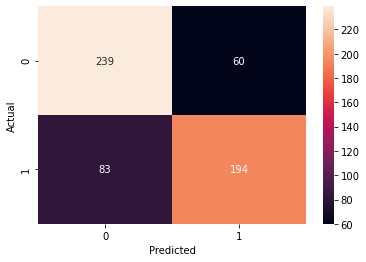

In [208]:
#Print Confusion Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [216]:
#Print Accuracy Score
y_pred = log_reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [210]:
#Print Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       299
           1       0.76      0.70      0.73       277

    accuracy                           0.75       576
   macro avg       0.75      0.75      0.75       576
weighted avg       0.75      0.75      0.75       576



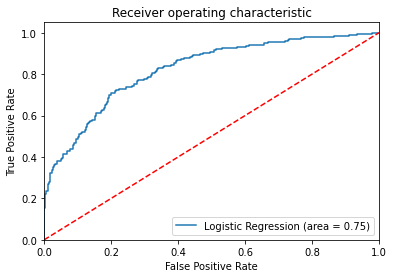

In [218]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [249]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.512603
         Iterations 10
                                     Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.256      
Dependent Variable:         choice_binary           AIC:                     2391.0009  
Date:                       2021-05-15 14:09        BIC:                     2482.8585  
No. Observations:           2301                    Log-Likelihood:          -1179.5    
Df Model:                   15                      LL-Null:                 -1585.4    
Df Residuals:               2285                    LLR p-value:             2.5014e-163
Converged:                  1.0000                  Scale:                   1.0000     
No. Iterations:             10.0000                                                     
----------------------------------------------------------------------------------------
                         Coef.    Std.Err.  

In [251]:
from sklearn.feature_selection import RFE

rfe = RFE(log_reg, 10)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ True  True False False False False  True  True False False  True  True
  True  True  True  True False]
[1 1 7 5 2 3 1 1 6 8 1 1 1 1 1 1 4]


Our second model will scale continuous variables and re-run the previous logistic regression

In [236]:
df_logscale = df_logistic

In [238]:
# Scaled Variables
#Legroom
df_logscale["scaled_legroomA"] = preprocessing.scale(pd.to_numeric(df_logistic["legroomA_"]))
df_logscale["scaled_legroomB"] = preprocessing.scale(pd.to_numeric(df_logistic["legroomB_"]))

#Total Price
df_logscale["price_"] = preprocessing.scale(pd.to_numeric(df_logistic["price_"]))

#Variable Price
df_logscale["scaled_PriceA"] = preprocessing.scale(pd.to_numeric(df_logistic["priceA_"]))
df_logscale["scaled_PriceB"] = preprocessing.scale(pd.to_numeric(df_logistic["priceB_"]))

#Distance
df_logscale["scaled_distance"] = preprocessing.scale(df_logistic["distance_"])

In [239]:
# Define output variable
yscale = df_logscale.choice_binary
# Drop output variable from dataset to form input vector
Xscale = df_logscale.drop('choice_binary', axis=1)


# Use sklearn function train_test_split() to performa an 80-20 split
Xscale_train, Xscale_test, yscale_train, yscale_test = train_test_split(Xscale,yscale,test_size = 0.2)
# Verify shape of different sets
print("shape of original dataset :",df_logistic.shape)
print("shape of input - training set", Xscale_train.shape)
print("shape of output - training set", yscale_train.shape)
print("shape of input - testing set", Xscale_test.shape)
print("shape of output - testing set", yscale_test.shape)

shape of original dataset : (2877, 23)
shape of input - training set (2301, 22)
shape of output - training set (2301,)
shape of input - testing set (576, 22)
shape of output - testing set (576,)


In [241]:
# Create basic logistic regression model
log_reg_scale = LogisticRegression(max_iter = 500)
log_reg_scale.fit(Xscale_train,yscale_train)
y_pred_scale = log_reg_scale.predict(Xscale_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

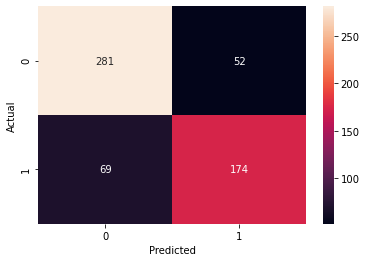

In [244]:
#Print Confusion Matrix
confusion_matrix = pd.crosstab(yscale_test, y_pred_scale, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [246]:
#Print Accuracy Score
y_pred_scale = log_reg_scale.predict(Xscale_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg_scale.score(Xscale_test, yscale_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [247]:
#Print Classification Report
print(classification_report(yscale_test,y_pred_scale))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       333
           1       0.77      0.72      0.74       243

    accuracy                           0.79       576
   macro avg       0.79      0.78      0.78       576
weighted avg       0.79      0.79      0.79       576



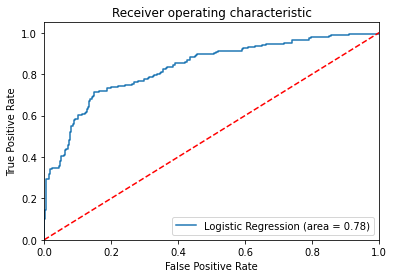

In [248]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yscale_test, log_reg_scale.predict(Xscale_test))
fpr, tpr, thresholds = roc_curve(yscale_test, log_reg_scale.predict_proba(Xscale_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [250]:
import statsmodels.api as sm
logit_model_scale=sm.Logit(yscale_train,Xscale_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.512603
         Iterations 10
                                     Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.256      
Dependent Variable:         choice_binary           AIC:                     2391.0009  
Date:                       2021-05-15 14:10        BIC:                     2482.8585  
No. Observations:           2301                    Log-Likelihood:          -1179.5    
Df Model:                   15                      LL-Null:                 -1585.4    
Df Residuals:               2285                    LLR p-value:             2.5014e-163
Converged:                  1.0000                  Scale:                   1.0000     
No. Iterations:             10.0000                                                     
----------------------------------------------------------------------------------------
                         Coef.    Std.Err.  

Currently each row of data corresponds to a participant-question combination which consists of two seat attributes (Seat A and Seat B). Although we are interested in this pair-wise comparison as structured from the survey, de-coupling this would be helpful in modeling for the coefficients associated with variables such as rows, legroom, price, etc. Thus, the following code will double the rows where 42 rows (21 questions * 2 seats/question) correspond to each participant.

In [242]:
# Double the rows
# df_clean2 = pd.DataFrame(np.repeat(df_clean.values,2,axis=0))
# df_clean2.columns = df_clean.columns

# df_clean2.reset_index()
# df_clean2['seat_indicator'] = np.where((df_clean2.index%2) == 0, 'Seat A','Seat B')

# #Seat String
# df_clean2['seat'] = np.where(df_clean2['seat_indicator'] == 'Seat A',
#                              df_clean2['rowA_'].astype(str) + df_clean2['colA_'],
#                              df_clean2['rowB_'].astype(str) + df_clean2['colB_'])

# #Binary Selection Variable
# df_clean2['selection'] = np.where(df_clean2['choice']==df_clean2['seat_indicator'],'1','0')

# #Create Selected and Alternative Columns
# df_clean2['legroom'] = np.where(df_clean2['selection'] == '1', 
#                         np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_legroomA'], df_clean2['scaled_legroomB']), 
#                          np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_legroomA'], df_clean2['scaled_legroomB']))
# df_clean2['legroom_alt'] = np.where(df_clean2['selection'] == '1', 
#                             np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_legroomB'], df_clean2['scaled_legroomA']), 
#                              np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_legroomB'], df_clean2['scaled_legroomA']))

# df_clean2['price_total'] = np.where(df_clean2['selection'] == '1', 
#                         np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_totalPriceA'], df_clean2['scaled_totalPriceB']), 
#                          np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_totalPriceA'], df_clean2['scaled_totalPriceB']))
# df_clean2['price_total_alt'] = np.where(df_clean2['selection'] == '1', 
#                             np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_totalPriceB'], df_clean2['scaled_totalPriceA']), 
#                              np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_totalPriceB'], df_clean2['scaled_totalPriceA']))

# df_clean2['price_increase'] = np.where(df_clean2['selection'] == '1', 
#                         np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_varPriceA'], df_clean2['scaled_varPriceB']), 
#                          np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_varPriceA'], df_clean2['scaled_varPriceB']))
# df_clean2['price_increase_alt'] = np.where(df_clean2['selection'] == '1', 
#                             np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_varPriceB'], df_clean2['scaled_varPriceA']), 
#                              np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_varPriceB'], df_clean2['scaled_varPriceA']))

# df_clean2['row'] = np.where(df_clean2['selection'] == '1', 
#                         np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['rowA_'], df_clean2['rowB_']), 
#                          np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['rowA_'], df_clean2['rowB_']))
# df_clean2['row_alt'] = np.where(df_clean2['selection'] == '1', 
#                             np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['rowB_'], df_clean2['rowA_']), 
#                              np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['rowB_'], df_clean2['rowA_']))

# df_clean2['column'] = np.where(df_clean2['selection'] == '1', 
#                         np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['colA_'], df_clean2['colB_']), 
#                          np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['colA_'], df_clean2['colB_']))
# df_clean2['column_alt'] = np.where(df_clean2['selection'] == '1', 
#                             np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['colB_'], df_clean2['colA_']), 
#                              np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['colB_'], df_clean2['colA_']))

# #Drop Unnecessary Columns
# df_clean2.drop(['legroomA_','legroomB_','scaled_legroomA','scaled_legroomB','priceA_','priceB_','scaled_varPriceA',
#                 'scaled_varPriceB','time_started','comment','survey.1.subsession.round_number',
#                'survey.1.group.id_in_subsession','current_app_name','id_in_session','id_in_group','session_code',
#                'index_in_pages','seat_indicator','colA_','colB_','rowA_','rowB_','scaled_totalPriceA','scaled_totalPriceB','age',
#                 'distance_','height_feet','height_inches','choice','price_'], inplace = True, axis = 1)

# #Order Columns
# df_clean = df_clean2[['selection','seat','row','row_alt','column','column_alt','legroom','legroom_alt',
#                      'price_total','price_total_alt','price_increase','price_increase_alt','scaled_distance',
#                       'time_','scaled_age','scaled_height','gender',
#                       'percentage_biz','annual_trip_freq','seat_type_preference',
#                       'section_preference','page_sequence']]

In [44]:
df_clean.to_csv('seatsurvey_cleannew.csv', header=True)

In [220]:
sudo pip install xgboost

SyntaxError: invalid syntax (<ipython-input-220-ad98ff1dc060>, line 1)

We can also try an XGBoost Classification Model on the unscaled data. 

In [222]:
from xgboost import XGBClassifier

In [253]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_scale_model = XGBClassifier()
xgb_scale_model.fit(Xscale_train, yscale_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:21:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [254]:
print(xgb_model)
print(xgb_scale_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, 

In [255]:
# make predictions for test data
xgb_ypred = xgb_model.predict(X_test)
xgb_scale_ypred = xgb_scale_model.predict(Xscale_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

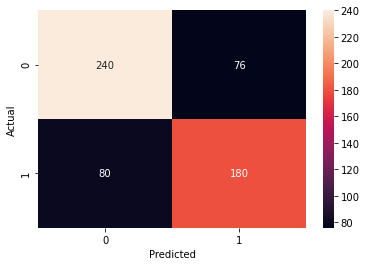

In [262]:
#Print Confusion Matrix
confusion_matrix = pd.crosstab(y_test, xgb_ypred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='g')

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

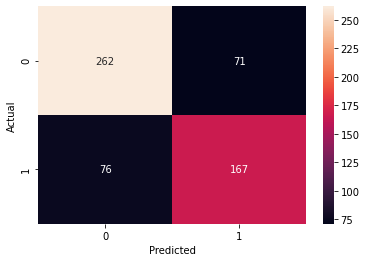

In [259]:
confusion_matrix_scale = pd.crosstab(yscale_test, xgb_scale_ypred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_scale, annot=True, fmt='g')

In [260]:
#Print Classification Report
print(classification_report(y_test,xgb_ypred))
print(classification_report(yscale_test,xgb_scale_ypred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       316
           1       0.70      0.69      0.70       260

    accuracy                           0.73       576
   macro avg       0.73      0.73      0.73       576
weighted avg       0.73      0.73      0.73       576

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       333
           1       0.70      0.69      0.69       243

    accuracy                           0.74       576
   macro avg       0.74      0.74      0.74       576
weighted avg       0.74      0.74      0.74       576

